# TensorFlow MNIST Fashion Assignment

### Import libraries

In [1]:
import numpy as np
import time
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as metrics
import tensorflow as tf

import matplotlib.pyplot as plt

### Load Fashion Data

In [2]:
# Fashion data
mnist = tf.keras.datasets.fashion_mnist

Fashion data training and testing data:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

### Split data

In [3]:
# Create training and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train = x_train / 255
x_test = x_test / 255

# Print shape
print(x_train.shape)
print(y_train.shape)  

(60000, 28, 28)
(60000,)


In [4]:
# Input shape for models
INPUT_SHAPE = x_train[0].shape
print("Shape = ", INPUT_SHAPE )

# Total size of data for models
TOTAL_SIZE = INPUT_SHAPE[0] * INPUT_SHAPE[1]
print("TOTAL SIZE = ", TOTAL_SIZE)

Shape =  (28, 28)
TOTAL SIZE =  784


### Test Random Images From Data

In [5]:
# Define user function
def getRandomIndex(DATA):
    return random.randint(0, DATA.shape[0])

who = 9809
3


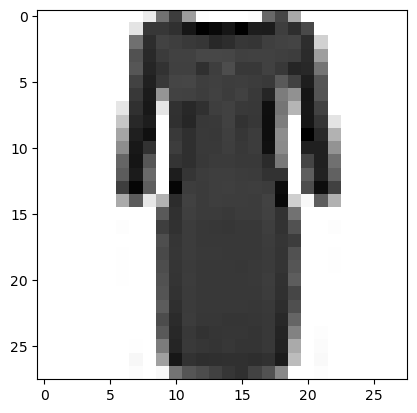

In [6]:
# Get random image #1
who=0
who=getRandomIndex(x_train)

print("who =", who)
print(y_train[who])
plt.imshow(x_train[who], plt.cm.binary)

who = 9141
9


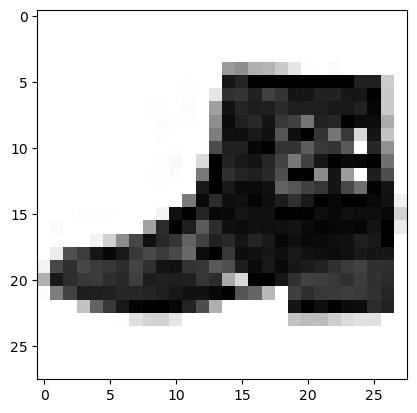

In [7]:
# Get random image #2
who=0
who=getRandomIndex(x_train)

print("who =", who)
print(y_train[who])
plt.imshow(x_train[who], plt.cm.binary)

who = 3208
2


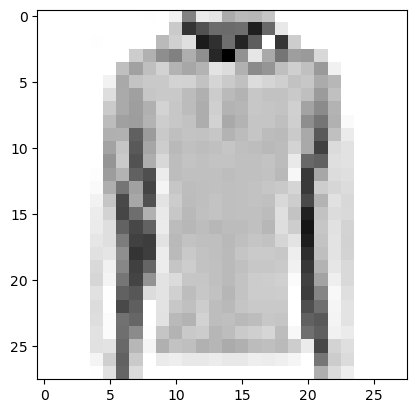

In [8]:
# Get random image #3
who=0
who=getRandomIndex(x_train)

print("who =", who)
print(y_train[who])
plt.imshow(x_train[who], plt.cm.binary)

### Random Forest

In [9]:
# Create flattened data
new_x_train = []
for i in x_train:
    new_x_train.append(i.flatten())
new_x_train = np.array(new_x_train) # Turn into array

new_x_test = []
for i in x_test:
    new_x_test.append(i.flatten())
new_x_test = np.array(new_x_test) # Turn into array

# Print new data
print(new_x_train.shape)
print(new_x_test.shape)

(60000, 784)
(10000, 784)


In [10]:
# Create RF classifier
Trees = int(2*TOTAL_SIZE)

clf_rf = RandomForestClassifier(n_estimators=Trees)
clf_rf.fit(new_x_train, y_train)

,n_estimators,1568
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
# Prediction - train
pred_train = clf_rf.predict(new_x_train)

# Print accuracy
RF_acc_train = metrics.accuracy_score(y_train, pred_train)
print("RF accuracy Train =", RF_acc_train)

# Prediction - test
pred_test = clf_rf.predict(new_x_test)

# Print accuracy
RF_acc_test = metrics.accuracy_score(y_test, pred_test)
print("RF accuracy Test =", RF_acc_test)

RF accuracy Train = 1.0
RF accuracy Test = 0.8787


### Gradient Boosting

In [13]:
# GB hyperparameters
Trees = 200
lr = 0.05
depth = 5
sample = 0.8

# Create GB classifer
clf_gb = GradientBoostingClassifier(n_estimators=Trees, learning_rate=lr, max_depth=depth, subsample=sample)
clf_gb.fit(new_x_train, y_train)

,loss,'log_loss'
,learning_rate,0.05
,n_estimators,200
,subsample,0.8
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,5
,min_impurity_decrease,0.0
,init,None


In [14]:
# Prediction - train
pred_train = clf_gb.predict(new_x_train)

# Print accuracy
GB_acc_train = metrics.accuracy_score(y_train, pred_train)
print("GB accuracy Train =", GB_acc_train)

# Prediction - test
pred_test = clf_gb.predict(new_x_test)

# Print accuracy
GB_acc_test = metrics.accuracy_score(y_test, pred_test)
print("GB accuracy Test =", GB_acc_test)

GB accuracy Train = 0.9648833333333333
GB accuracy Test = 0.8825


### TensorFlow using Neural Networks

In [15]:
# Define TF model
Epochs = 20

Activation = tf.keras.activations.relu

unit_01 = int(2*TOTAL_SIZE)
unit_02 = unit_01

DENSE_LAYER_01 = tf.keras.layers.Dense(units=unit_01, activation=Activation) # Input layer
DENSE_LAYER_02 = tf.keras.layers.Dense(units=unit_02, activation=Activation) # Hidden layer
DENSE_LAYER_XX = tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax) # Output layer

DROPOUT_LAYER = tf.keras.layers.Dropout(0.3) # Add dropout layer

Optimizer = tf.keras.optimizers.Adam() # Add optimizer
LossMetric = tf.keras.losses.SparseCategoricalCrossentropy() # Add loss metric

# Model enchancements
Split = 0.3
BatchSize = 32
verboseFlag = True

# Save model
TFSaveFile = "TF_Fashion_Model.keras"

In [16]:
# Build TF model
model = tf.keras.models.Sequential() 
model.add(tf.keras.layers.Flatten(input_shape=INPUT_SHAPE,))
model.add(DENSE_LAYER_01)
model.add(DROPOUT_LAYER)
model.add(DENSE_LAYER_02)
model.add(DROPOUT_LAYER)
model.add(DENSE_LAYER_XX)
model.compile(optimizer=Optimizer, loss=LossMetric, metrics=['accuracy'])
model.fit(x_train, y_train, epochs=Epochs, validation_split=Split, batch_size=BatchSize, verbose=verboseFlag)

C:\Users\joshp\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 39s 29ms/step - accuracy: 0.7985 - loss: 0.5541 - val_accuracy: 0.8431 - val_loss: 0.4275
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.8394 - loss: 0.4378 - val_accuracy: 0.8619 - val_loss: 0.3868
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.8531 - loss: 0.4045 - val_accuracy: 0.8674 - val_loss: 0.3689
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.8604 - loss: 0.3838 - val_accuracy: 0.8690 - val_loss: 0.3681
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.8639 - loss: 0.3678 - val_accuracy: 0.8758 - val_loss: 0.3428
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.8688 - loss: 0.3593 - val_accuracy: 0.8731 - val_loss: 0.3496
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - accuracy: 0.8723 - loss: 0.3468 - val_accuracy: 0.8814 - val_loss: 0.3424
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 39s 29ms/step - accuracy: 0.8738 -

In [17]:
# Print metrics
NN_loss, NN_acc_test = model.evaluate(x_test, y_test)
print("Loss =", NN_loss)
print("Accuracy =", NN_acc_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8779 - loss: 0.3666
Loss = 0.36660557985305786
Accuracy = 0.8779000043869019


In [18]:
# Save model
model.save(TFSaveFile)

### Load model into new object and predict data with new object

In [19]:
# Load model into new object
new_model = tf.keras.models.load_model(TFSaveFile)

In [20]:
# Get predictions
predictions = new_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


predict = 0 actual = 6


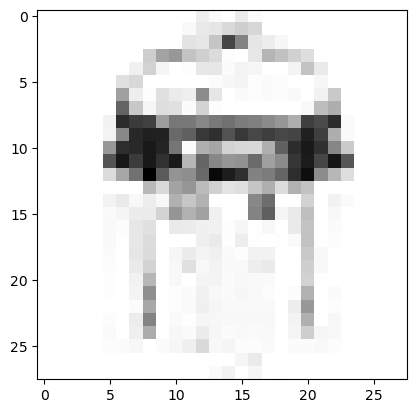

In [21]:
# Print prediction
who = getRandomIndex(x_test)

# Get results
result = np.argmax(list(predictions[who]))

# Print output
print("predict =", result, "actual =", y_train[who])
plt.imshow(x_test[who], plt.cm.binary)

### Model Comparison

In [23]:
# Print accuracies
print("RF accuracy =", RF_acc_test)
print("GB accuracy =", GB_acc_test)
print("NN accuracy =", NN_acc_test)

RF accuracy = 0.8787
GB accuracy = 0.8825
NN accuracy = 0.8779000043869019


# Summary

Based on the results from the TensorFlow MNIST Fashion dataset, Gradient Boosting (GB) achieved the highest accuracy at 88.25%, slightly outperforming Random Forest (87.87%) and the Neural Network (87.79%). While all three models performed comparably, GB consistently demonstrated a slight edge, making it the most accurate for this experiment. Random Forest also performed well and has the advantage of easier interpretability and faster training, while the Neural Network, though flexible, slightly underperformed in this setup and would require further tuning to surpass the tree-based methods.

For a real-world production scenario, I would recommend deploying the Gradient Boosting model. Its superior accuracy, robustness to outliers, and ability to provide feature importance metrics make it well-suited for practical applications. While Random Forest could be considered if interpretability or training speed were priorities, the small increase in accuracy offered by GB generally outweighs these concerns. Neural Networks could be explored in future iterations with more complex data, but for this dataset, GB represents the best balance of performance and reliability.